# Aula 11

# Setup

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #Regressão Linear
from sklearn.linear_model import LogisticRegression #Regressão Linear
from sklearn import svm #Máquina de Vetor de Suporte
from sklearn.cluster import KMeans


import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', 100)

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Construção da Base

In [2]:
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'}

activity_color_map = {activity_codes_mapping['A']: 'lime',
                      activity_codes_mapping['B']: 'red',
                      activity_codes_mapping['C']: 'blue',
                      activity_codes_mapping['D']: 'orange',
                      activity_codes_mapping['E']: 'yellow',
                      activity_codes_mapping['F']: 'lightgreen',
                      activity_codes_mapping['G']: 'greenyellow',
                      activity_codes_mapping['H']: 'magenta',
                      activity_codes_mapping['I']: 'gold',
                      activity_codes_mapping['J']: 'cyan',
                      activity_codes_mapping['K']: 'purple',
                      activity_codes_mapping['L']: 'lightgreen',
                      activity_codes_mapping['M']: 'violet',
                      activity_codes_mapping['O']: 'limegreen',
                      activity_codes_mapping['P']: 'deepskyblue',   
                      activity_codes_mapping['Q']: 'mediumspringgreen',
                      activity_codes_mapping['R']: 'plum',
                      activity_codes_mapping['S']: 'olive'}
#                     activity_codes_mapping['A']: 'rgb(231, 41, 138)',

In [3]:
features = ['ACTIVITY',
            'X0', # 1st bin fraction of x axis acceleration distribution
            'X1', # 2nd bin fraction ...
            'X2',
            'X3',
            'X4',
            'X5',
            'X6',
            'X7',
            'X8',
            'X9',
            'Y0', # 1st bin fraction of y axis acceleration distribution
            'Y1', # 2nd bin fraction ...
            'Y2',
            'Y3',
            'Y4',
            'Y5',
            'Y6',
            'Y7',
            'Y8',
            'Y9',
            'Z0', # 1st bin fraction of z axis acceleration distribution
            'Z1', # 2nd bin fraction ...
            'Z2',
            'Z3',
            'Z4',
            'Z5',
            'Z6',
            'Z7',
            'Z8',
            'Z9',
            'XAVG', # average sensor value over the window (per axis)
            'YAVG',
            'ZAVG',
            'XPEAK', # Time in milliseconds between the peaks in the wave associated with most activities. heuristically determined (per axis)
            'YPEAK',
            'ZPEAK',
            'XABSOLDEV', # Average absolute difference between the each of the 200 readings and the mean of those values (per axis)
            'YABSOLDEV',
            'ZABSOLDEV',
            'XSTANDDEV', # Standard deviation of the 200 window's values (per axis)  ***BUG!***
            'YSTANDDEV',
            'ZSTANDDEV',
            'XVAR', # Variance of the 200 window's values (per axis)   ***BUG!***
            'YVAR',
            'ZVAR',
            'XMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'XMFCC1',
            'XMFCC2',
            'XMFCC3',
            'XMFCC4',
            'XMFCC5',
            'XMFCC6',
            'XMFCC7',
            'XMFCC8',
            'XMFCC9',
            'XMFCC10',
            'XMFCC11',
            'XMFCC12',
            'YMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'YMFCC1',
            'YMFCC2',
            'YMFCC3',
            'YMFCC4',
            'YMFCC5',
            'YMFCC6',
            'YMFCC7',
            'YMFCC8',
            'YMFCC9',
            'YMFCC10',
            'YMFCC11',
            'YMFCC12',
            'ZMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'ZMFCC1',
            'ZMFCC2',
            'ZMFCC3',
            'ZMFCC4',
            'ZMFCC5',
            'ZMFCC6',
            'ZMFCC7',
            'ZMFCC8',
            'ZMFCC9',
            'ZMFCC10',
            'ZMFCC11',
            'ZMFCC12',
            'XYCOS', # The cosine distances between sensor values for pairs of axes (three pairs of axes)
            'XZCOS',
            'YZCOS',
            'XYCOR', # The correlation between sensor values for pairs of axes (three pairs of axes)
            'XZCOR',
            'YZCOR',
            'RESULTANT', # Average resultant value, computed by squaring each matching x, y, and z value, summing them, taking the square root, and then averaging these values over the 200 readings
            'PARTICIPANT'] # Categirical: 1600 -1650

len(features)

93

In [4]:
import glob

#the duplicate files to be ignored; all identical to 1600
duplicate_files = [str(i) for i in range(1611, 1618)] # '1611',...'1617'

path = r'/Data/wisdm-dataset/arff_files/phone/gyro'
all_files_2 = glob.glob('Data/wisdm-dataset/arff_files/phone/gyro' + "/*.arff")

list_dfs_phone_gyro = []

for filename in all_files_2:

    if any(dup_fn in filename for dup_fn in duplicate_files):
        continue #ignore the duplicate files
    df_2 = pd.read_csv(filename, names = features, skiprows = 96, index_col=None, header=0)
    list_dfs_phone_gyro.append(df_2)

all_phone_gyro = pd.concat(list_dfs_phone_gyro, axis=0, ignore_index=True, sort=False)

all_phone_gyro

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,A,0.030,0.420,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030,0.500,0.460,0.010,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.575,0.420,0.005,0.0,0.0,0.0,0.0,0,0.0,0.038533,-0.001582,0.049920,50.5405,37.2549,41.5556,0.913016,0.879896,0.706906,0.080703,0.081965,0.062451,0.284083,0.286295,0.249902,0.247956,0.350474,0.349911,0.348974,0.347662,0.345979,0.343924,0.341502,0.338714,0.335563,0.332053,0.328187,0.323970,0.273274,0.386261,0.385641,0.384607,0.383162,0.381306,0.379043,0.376373,0.373300,0.369827,0.365959,0.361698,0.357050,0.210509,0.297545,0.297067,0.296271,0.295157,0.293728,0.291984,0.289927,0.287560,0.284885,0.281905,0.278623,0.275043,0.206135,-0.594069,-0.055150,0.206299,-0.597265,-0.055161,1.659600,1610
1,A,0.015,0.395,0.590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.525,0.445,0.005,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.585,0.415,0.000,0.0,0.0,0.0,0.0,0,0.0,0.045903,-0.040086,0.025695,47.9487,36.4815,37.8431,0.825133,0.955707,0.667639,0.075179,0.086126,0.058514,0.274188,0.293472,0.241896,0.228400,0.322833,0.322314,0.321451,0.320243,0.318692,0.316800,0.314568,0.312000,0.309097,0.305864,0.302303,0.298419,0.270573,0.382444,0.381829,0.380806,0.379375,0.377538,0.375296,0.372653,0.369610,0.366172,0.362341,0.358123,0.353521,0.191498,0.270674,0.270239,0.269515,0.268502,0.267201,0.265615,0.263744,0.261591,0.259157,0.256446,0.253461,0.250204,0.148017,-0.632868,0.105771,0.149656,-0.635104,0.106901,1.627080,1610
2,A,0.025,0.445,0.530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020,0.480,0.500,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.560,0.435,0.005,0.0,0.0,0.0,0.0,0,0.0,-0.004285,0.012332,0.034169,50.0000,40.0000,38.8000,0.944411,1.007460,0.713279,0.082198,0.085093,0.062675,0.286703,0.291707,0.250350,0.245699,0.347285,0.346727,0.345798,0.344498,0.342830,0.340794,0.338394,0.335631,0.332509,0.329031,0.325200,0.321021,0.272400,0.385025,0.384407,0.383377,0.381936,0.380086,0.377829,0.375168,0.372105,0.368644,0.364787,0.360540,0.355908,0.197548,0.279225,0.278777,0.278029,0.276985,0.275643,0.274007,0.272077,0.269855,0.267345,0.264548,0.261468,0.258109,0.138255,-0.618223,0.094411,0.138301,-0.618545,0.094091,1.747030,1610
3,A,0.010,0.460,0.530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020,0.505,0.470,0.005,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.545,0.455,0.000,0.0,0.0,0.0,0.0,0,0.0,-0.046410,-0.033583,0.053663,55.1429,42.3913,42.6087,0.847282,1.041240,0.705151,0.074618,0.088852,0.060752,0.273162,0.298081,0.246478,0.227473,0.321523,0.321007,0.320147,0.318943,0.317399,0.315514,0.313292,0.310734,0.307843,0.304623,0.301077,0.297208,0.282626,0.399479,0.398838,0.397769,0.396274,0.394355,0.392013,0.389252,0.386074,0.382483,0.378482,0.374075,0.369269,0.191983,0.271360,0.270924,0.270198,0.269182,0.267879,0.266288,0.264413,0.262254,0.259814,0.257096,0.254103,0.250838,-0.038740,-0.602267,0.130603,-0.039967,-0.601277,0.132573,1.717630,1610
4,A,0.015,0.420,0.565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035,0.465,0.470,0.030,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.535,0.450,0.015,0.0,0.0,0.0,0.0,0,0.0,0.043566,-0.012890,0.086710,54.4118,41.9565,38.9583,0.899946,1.236410,0.717374,0.080109,0.105679,0.063827,0.283035,0.325083,0.252641,0.244444,0.345511,0.344956,0.344032,0.342739,0.341079,0.339054,0.336666,0.333917,0.330811,0.327350,0.323539,0.319382,0.304020,0.429719,0.429029,0.427879,0.426271,0.424207,0.421688,0.418718,0.415300,0.411436,0.407132,0.402392,0.397222,0.216387,0.305854,0.305363,0.304544,0.303400,0.301930,0.300138,0.298024,0.295590,0.292841,0.289777,0.286404,0.282723,-0.017312,-0.485468,-0.0527

In [5]:
import glob

#the duplicate files to be ignored; all identical to 1600
duplicate_files = [str(i) for i in range(1611, 1618)] # '1611',...'1617'

path = r'/Data/wisdm-dataset/arff_files/phone/accel'
all_files = glob.glob('Data/wisdm-dataset/arff_files/phone/accel' + "/*.arff")

list_dfs_phone_accel = []

for filename in all_files:

    if any(dup_fn in filename for dup_fn in duplicate_files):
        continue #ignore the duplicate files
    df = pd.read_csv(filename, names = features, skiprows = 96, index_col=None, header=0)
    list_dfs_phone_accel.append(df)

all_phone_accel = pd.concat(list_dfs_phone_accel, axis=0, ignore_index=True, sort=False)

all_phone_accel

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,A,0.255,0.100,0.135,0.160,0.190,0.095,0.045,0.010,0.005,0.005,0.925,0.040,0.035,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.295,0.225,0.225,0.145,0.060,0.045,0.005,0.000,0.000,0.0,1.479770,-8.29618,-0.417344,51.6216,52.4324,45.8537,5.48761,3.44706,3.65639,0.493179,0.320358,0.331520,0.702267,0.566002,0.575778,0.506695,0.716191,0.715040,0.713124,0.710444,0.707003,0.702805,0.697855,0.692158,0.685719,0.678546,0.670646,0.662028,0.471490,0.666431,0.665360,0.663577,0.661083,0.657881,0.653975,0.649369,0.644067,0.638076,0.631401,0.624050,0.616031,0.482004,0.681292,0.680197,0.678374,0.675825,0.672552,0.668559,0.663850,0.658430,0.652305,0.645481,0.637966,0.629769,-0.213821,0.069463,0.161148,-0.067541,0.090176,0.174550,11.9653,1646
1,A,0.000,0.000,0.035,0.275,0.340,0.195,0.100,0.040,0.015,0.000,0.935,0.065,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.240,0.280,0.225,0.195,0.040,0.015,0.005,0.000,0.000,0.0,6.864470,-6.84821,0.129032,60.6667,78.7500,60.6452,2.38387,2.44465,2.71542,0.211992,0.208677,0.241307,0.460426,0.456812,0.491231,0.410586,0.580346,0.579414,0.577861,0.575689,0.572901,0.569500,0.565488,0.560871,0.555654,0.549841,0.543440,0.536457,0.393993,0.556892,0.555998,0.554508,0.552424,0.549749,0.546485,0.542635,0.538205,0.533198,0.527621,0.521478,0.514777,0.409940,0.579433,0.578502,0.576952,0.574783,0.572000,0.568604,0.564599,0.559989,0.554780,0.548976,0.542585,0.535613,-0.902077,0.024633,-0.124074,-0.381854,-0.024982,-0.225997,10.5035,1646
2,A,0.000,0.000,0.040,0.335,0.300,0.225,0.080,0.020,0.000,0.000,0.955,0.040,0.005,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.375,0.310,0.190,0.075,0.035,0.010,0.000,0.000,0.005,0.0,6.449380,-7.11874,-1.471060,62.3333,75.3846,58.4848,2.12090,2.53115,2.89131,0.184104,0.221131,0.266891,0.429073,0.470246,0.516615,0.392406,0.554649,0.553758,0.552274,0.550198,0.547534,0.544283,0.540449,0.536037,0.531050,0.525495,0.519377,0.512703,0.411506,0.581646,0.580712,0.579156,0.576979,0.574185,0.570776,0.566755,0.562128,0.556899,0.551073,0.544658,0.537659,0.420888,0.594907,0.593951,0.592360,0.590134,0.587276,0.583789,0.579677,0.574944,0.569596,0.563637,0.557075,0.549917,-0.892358,-0.300923,0.214313,-0.288103,0.102674,-0.315305,10.6707,1646
3,A,0.000,0.000,0.055,0.360,0.265,0.225,0.080,0.010,0.005,0.000,0.950,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.390,0.250,0.175,0.085,0.075,0.025,0.000,0.000,0.000,0.0,6.184580,-7.28402,-1.023310,61.2500,78.6957,67.5000,2.19038,2.43768,3.22230,0.187871,0.210694,0.283469,0.433441,0.459015,0.532418,0.392728,0.555104,0.554212,0.552727,0.550650,0.547983,0.544729,0.540892,0.536476,0.531486,0.525926,0.519803,0.513124,0.403648,0.570539,0.569622,0.568096,0.565961,0.563220,0.559876,0.555932,0.551393,0.546264,0.540550,0.534257,0.527391,0.423289,0.598301,0.597340,0.595739,0.593500,0.590626,0.587119,0.582983,0.578224,0.572845,0.566852,0.560253,0.553054,-0.907386,-0.170813,0.115650,-0.381303,0.147561,-0.308758,10.6683,1646
4,A,0.005,0.005,0.040,0.310,0.265,0.245,0.090,0.040,0.000,0.000,0.910,0.080,0.005,0.005,0.000,0.000,0.000,0.000,0.0,0.0,0.475,0.205,0.170,0.065,0.050,0.015,0.015,0.005,0.000,0.0,6.633070,-6.68428,-1.777950,54.0000,75.6000,56.1765,2.50773,2.91527,3.57323,0.217760,0.255474,0.324149,0.466647,0.505444,0.569340,0.423361,0.598402,0.597441,0.595840,0.593601,0.590726,0.587218,0.583082,0.578322,0.572942,0.566949,0.560348,0.553148,0.438398,0.619657,0.618661,0.617003,0.614685,0.611708,0.608076,0.603793,0.598863,0.593292,0.587086,0.580251,0

# Redimensionamento da Base

In [6]:
#I want to work just with bins X - Z, and X,Y and Z means.
cel_acelerometro = all_phone_accel.iloc[:,0:34].merge(all_phone_accel.iloc[:,91:93],
                                                      left_index = True,
                                                      right_index = True,
                                                      how = 'left')

In [7]:
cel_acelerometro

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,RESULTANT,PARTICIPANT
0,A,0.255,0.100,0.135,0.160,0.190,0.095,0.045,0.010,0.005,0.005,0.925,0.040,0.035,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.295,0.225,0.225,0.145,0.060,0.045,0.005,0.000,0.000,0.0,1.479770,-8.29618,-0.417344,11.9653,1646
1,A,0.000,0.000,0.035,0.275,0.340,0.195,0.100,0.040,0.015,0.000,0.935,0.065,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.240,0.280,0.225,0.195,0.040,0.015,0.005,0.000,0.000,0.0,6.864470,-6.84821,0.129032,10.5035,1646
2,A,0.000,0.000,0.040,0.335,0.300,0.225,0.080,0.020,0.000,0.000,0.955,0.040,0.005,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.375,0.310,0.190,0.075,0.035,0.010,0.000,0.000,0.005,0.0,6.449380,-7.11874,-1.471060,10.6707,1646
3,A,0.000,0.000,0.055,0.360,0.265,0.225,0.080,0.010,0.005,0.000,0.950,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.390,0.250,0.175,0.085,0.075,0.025,0.000,0.000,0.000,0.0,6.184580,-7.28402,-1.023310,10.6683,1646
4,A,0.005,0.005,0.040,0.310,0.265,0.245,0.090,0.040,0.000,0.000,0.910,0.080,0.005,0.005,0.000,0.000,0.000,0.000,0.0,0.0,0.475,0.205,0.170,0.065,0.050,0.015,0.015,0.005,0.000,0.0,6.633070,-6.68428,-1.777950,10.9406,1646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20645,S,0.695,0.070,0.065,0.085,0.060,0.020,0.000,0.000,0.005,0.000,0.660,0.305,0.035,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.365,0.135,0.150,0.335,0.015,0.000,0.000,0.000,0.000,0.0,-4.565200,-4.93988,-0.500969,10.1463,1640
20646,S,0.960,0.030,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.605,0.140,0.210,0.030,0.000,0.000,0.010,0.005,0.0,0.0,0.245,0.195,0.150,0.290,0.095,0.015,0.005,0.005,0.000,0.0,-7.625020,-3.24939,0.566857,10.3318,1640
20647,S,0.385,0.070,0.230,0.190,0.095,0.025,0.005,0.000,0.000,0.000,0.860,0.090,0.035,0.000,0.010,0.005,0.000,0.000,0.0,0.0,0.515,0.165,0.105,0.095,0.030,0.060,0.030,0.000,0.000,0.0,-0.713658,-6.67207,-1.507570,10.4719,1640
20648,S,0.680,0.045,0.080,0.075,0.070,0.045,0.000,0.005,0.000,0.000,0.785,0.160,0.025,0.005,0.005,0.015,0.005,0.000,0.0,0.0,0.380,0.185,0.195,0.200,0.035,0.005,0.000,0.000,0.000,0.0,-3.760120,-5.61559,-0.906989,10.3235,1640


# Transformação

In [8]:
# Rename activities 
cel_acelerometro['ACTIVITY'] = np.select([cel_acelerometro['ACTIVITY']=='A',
                                          cel_acelerometro['ACTIVITY']=='B',
                                          cel_acelerometro['ACTIVITY']=='C',
                                          cel_acelerometro['ACTIVITY']=='D',
                                          cel_acelerometro['ACTIVITY']=='E',
                                          cel_acelerometro['ACTIVITY']=='F',
                                          cel_acelerometro['ACTIVITY']=='G',
                                          cel_acelerometro['ACTIVITY']=='H',
                                          cel_acelerometro['ACTIVITY']=='I',
                                          cel_acelerometro['ACTIVITY']=='J',
                                          cel_acelerometro['ACTIVITY']=='K',
                                          cel_acelerometro['ACTIVITY']=='L',
                                          cel_acelerometro['ACTIVITY']=='M',
                                          cel_acelerometro['ACTIVITY']=='O',
                                          cel_acelerometro['ACTIVITY']=='P',
                                          cel_acelerometro['ACTIVITY']=='Q',
                                          cel_acelerometro['ACTIVITY']=='R',
                                          cel_acelerometro['ACTIVITY']=='S'],
                                          ['andar','correr','escadas','sentado','em_pe','digitando','escovando_dentes','tomando_sopa',
                                          'comendo_fritas','comendo_massa','bebendo_copo','comendo_lanche','chutando_bola',
                                           'jogando_bola_tenis',
                                          'dribland_basquete','escrevendo','aplaudindo','dobrando_roupas'])

# Primeiras Análises Descritivas

<AxesSubplot:title={'center':'row count per activity'}>

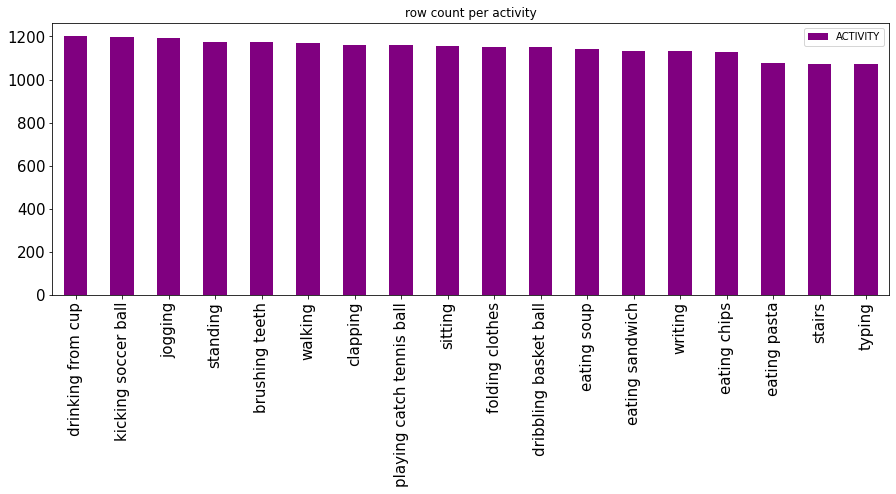

In [9]:
all_phone_accel['ACTIVITY'].map(activity_codes_mapping).value_counts().plot(kind = 'bar', 
                                                                                figsize = (15,5), 
                                                                                color = 'purple',
                                                                                title = 'row count per activity',
                                                                                legend = True,
                                                                                fontsize = 15)

<AxesSubplot:title={'center':'rows count per participant'}>

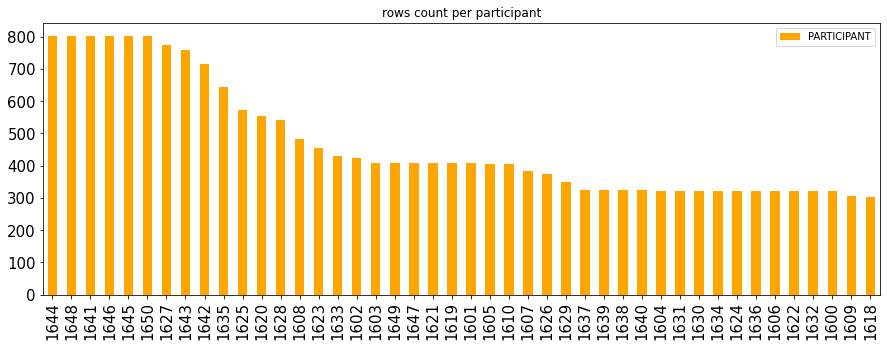

In [10]:
all_phone_accel['PARTICIPANT'].value_counts().plot(kind = 'bar',
                                                   figsize = (15,5),
                                                   color = 'orange',
                                                   title= 'rows count per participant',
                                                   legend = True,
                                                   fontsize = 15)

In [11]:
# Just "A" ctivity - Walk
cel_acelerometro[cel_acelerometro['ACTIVITY']=='andar']

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,RESULTANT,PARTICIPANT
0,andar,0.255,0.100,0.135,0.160,0.190,0.095,0.045,0.010,0.005,0.005,0.925,0.040,0.035,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.295,0.225,0.225,0.145,0.060,0.045,0.005,0.000,0.000,0.0,1.47977,-8.29618,-0.417344,11.9653,1646
1,andar,0.000,0.000,0.035,0.275,0.340,0.195,0.100,0.040,0.015,0.000,0.935,0.065,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.240,0.280,0.225,0.195,0.040,0.015,0.005,0.000,0.000,0.0,6.86447,-6.84821,0.129032,10.5035,1646
2,andar,0.000,0.000,0.040,0.335,0.300,0.225,0.080,0.020,0.000,0.000,0.955,0.040,0.005,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.310,0.190,0.075,0.035,0.010,0.000,0.000,0.005,0.0,6.44938,-7.11874,-1.471060,10.6707,1646
3,andar,0.000,0.000,0.055,0.360,0.265,0.225,0.080,0.010,0.005,0.000,0.950,0.050,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.390,0.250,0.175,0.085,0.075,0.025,0.000,0.000,0.000,0.0,6.18458,-7.28402,-1.023310,10.6683,1646
4,andar,0.005,0.005,0.040,0.310,0.265,0.245,0.090,0.040,0.000,0.000,0.910,0.080,0.005,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.475,0.205,0.170,0.065,0.050,0.015,0.015,0.005,0.000,0.0,6.63307,-6.68428,-1.777950,10.9406,1646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20339,andar,0.000,0.000,0.000,0.005,0.165,0.285,0.315,0.180,0.050,0.000,0.495,0.490,0.015,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.030,0.685,0.285,0.000,0.000,0.000,0.000,0.000,0.000,0.0,10.45210,-2.63618,-0.666408,10.9382,1640
20340,andar,0.000,0.000,0.000,0.000,0.195,0.280,0.320,0.165,0.040,0.000,0.470,0.530,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.030,0.730,0.240,0.000,0.000,0.000,0.000,0.000,0.000,0.0,10.15860,-2.60478,-0.722396,10.6380,1640
20341,andar,0.000,0.000,0.000,0.035,0.295,0.145,0.250,0.245,0.025,0.005,0.485,0.495,0.020,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.015,0.655,0.325,0.005,0.000,0.000,0.000,0.000,0.000,0.0,9.82173,-2.41814,-0.558693,10.2600,1640
20342,andar,0.000,0.000,0.000,0.000,0.315,0.195,0.225,0.240,0.025,0.000,0.460,0.535,0.005,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.015,0.680,0.305,0.000,0.000,0.000,0.000,0.000,0.000,0.0,9.90886,-2.35882,-0.575512,10.3006,1640


In [12]:
# Just "A" ctivity - Walk to 1646 participant
cel_acelerometro[(cel_acelerometro['PARTICIPANT']==1646) &
                (cel_acelerometro['ACTIVITY']=='andar')]

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,RESULTANT,PARTICIPANT
0,andar,0.255,0.100,0.135,0.160,0.190,0.095,0.045,0.010,0.005,0.005,0.925,0.040,0.035,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.295,0.225,0.225,0.145,0.060,0.045,0.005,0.000,0.000,0.0,1.47977,-8.296180,-0.417344,11.9653,1646
1,andar,0.000,0.000,0.035,0.275,0.340,0.195,0.100,0.040,0.015,0.000,0.935,0.065,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.240,0.280,0.225,0.195,0.040,0.015,0.005,0.000,0.000,0.0,6.86447,-6.848210,0.129032,10.5035,1646
2,andar,0.000,0.000,0.040,0.335,0.300,0.225,0.080,0.020,0.000,0.000,0.955,0.040,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.375,0.310,0.190,0.075,0.035,0.010,0.000,0.000,0.005,0.0,6.44938,-7.118740,-1.471060,10.6707,1646
3,andar,0.000,0.000,0.055,0.360,0.265,0.225,0.080,0.010,0.005,0.000,0.950,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.390,0.250,0.175,0.085,0.075,0.025,0.000,0.000,0.000,0.0,6.18458,-7.284020,-1.023310,10.6683,1646
4,andar,0.005,0.005,0.040,0.310,0.265,0.245,0.090,0.040,0.000,0.000,0.910,0.080,0.005,0.005,0.000,0.000,0.000,0.000,0.000,0.0,0.475,0.205,0.170,0.065,0.050,0.015,0.015,0.005,0.000,0.0,6.63307,-6.684280,-1.777950,10.9406,1646
5,andar,0.010,0.010,0.070,0.180,0.285,0.205,0.100,0.055,0.020,0.065,0.550,0.175,0.165,0.060,0.030,0.010,0.010,0.000,0.000,0.0,0.415,0.240,0.210,0.090,0.025,0.015,0.005,0.000,0.000,0.0,7.98800,-3.059330,-1.966980,11.2456,1646
6,andar,0.000,0.000,0.055,0.105,0.220,0.215,0.180,0.090,0.090,0.045,0.130,0.315,0.370,0.100,0.070,0.015,0.000,0.000,0.000,0.0,0.595,0.170,0.160,0.050,0.005,0.005,0.005,0.000,0.010,0.0,9.40688,0.371024,-3.424440,11.4817,1646
7,andar,0.000,0.005,0.065,0.145,0.195,0.145,0.215,0.110,0.060,0.060,0.130,0.265,0.435,0.085,0.075,0.010,0.000,0.000,0.000,0.0,0.520,0.265,0.145,0.040,0.015,0.000,0.010,0.005,0.000,0.0,9.28663,0.485015,-3.012490,11.0732,1646
8,andar,0.000,0.000,0.030,0.185,0.165,0.165,0.220,0.115,0.055,0.065,0.125,0.290,0.400,0.105,0.075,0.005,0.000,0.000,0.000,0.0,0.535,0.295,0.110,0.030,0.015,0.010,0.005,0.000,0.000,0.0,9.51830,0.457329,-3.263060,11.1540,1646
9,andar,0.000,0.000,0.040,0.120,0.220,0.155,0.245,0.120,0.055,0.045,0.115,0.300,0.415,0.100,0.050,0.020,0.000,0.000,0.000,0.0,0.510,0.270,0.175,0.025,0.000,0.010,0.005,0.005,0.000,0.0,9.41517,0.464825,-3.029020,11.0581,1646


<AxesSubplot:xlabel='PARTICIPANT', ylabel='X0'>

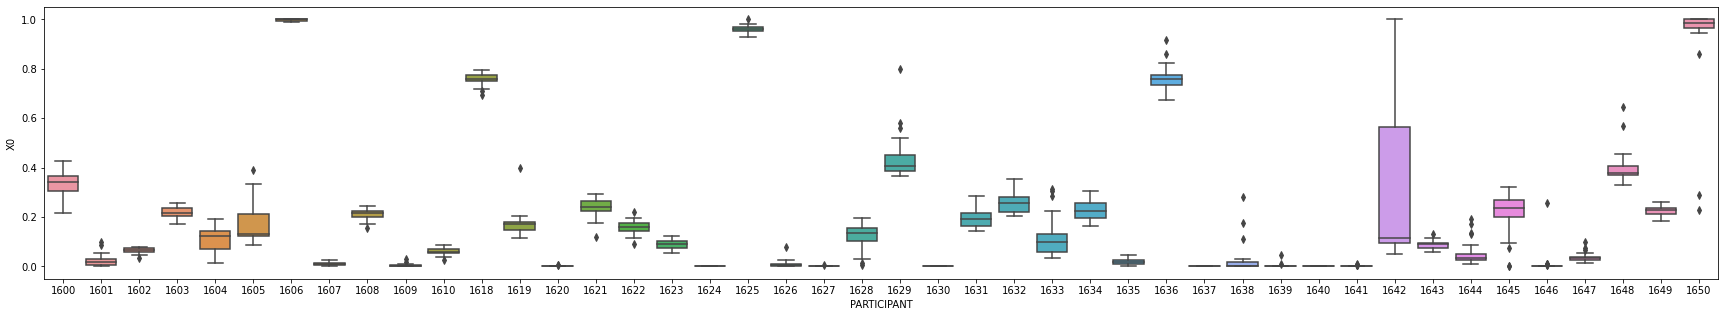

In [13]:
# Partcipants walking different ways for bin x0
plt.subplots(figsize=(30,5))
sns.boxplot(x = cel_acelerometro[cel_acelerometro['ACTIVITY']=='andar']['PARTICIPANT'],
            y = 'X0',
           data = cel_acelerometro)

<AxesSubplot:xlabel='PARTICIPANT', ylabel='X1'>

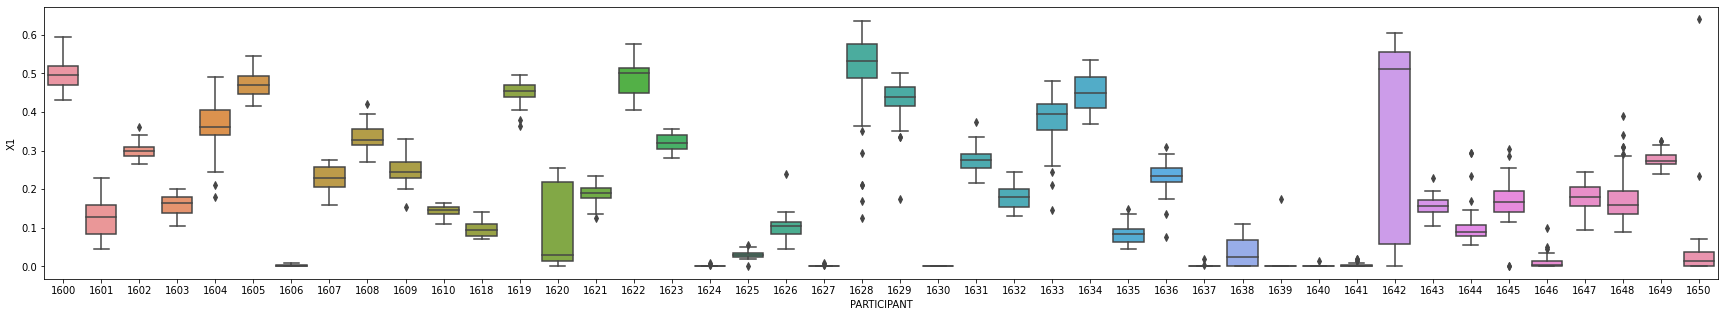

In [14]:
# Partcipants walking different ways for bin x1
plt.subplots(figsize=(30,5))
sns.boxplot(x = cel_acelerometro[cel_acelerometro['ACTIVITY']=='andar']['PARTICIPANT'],
            y = 'X1',
           data = cel_acelerometro)

<AxesSubplot:xlabel='PARTICIPANT', ylabel='XAVG'>

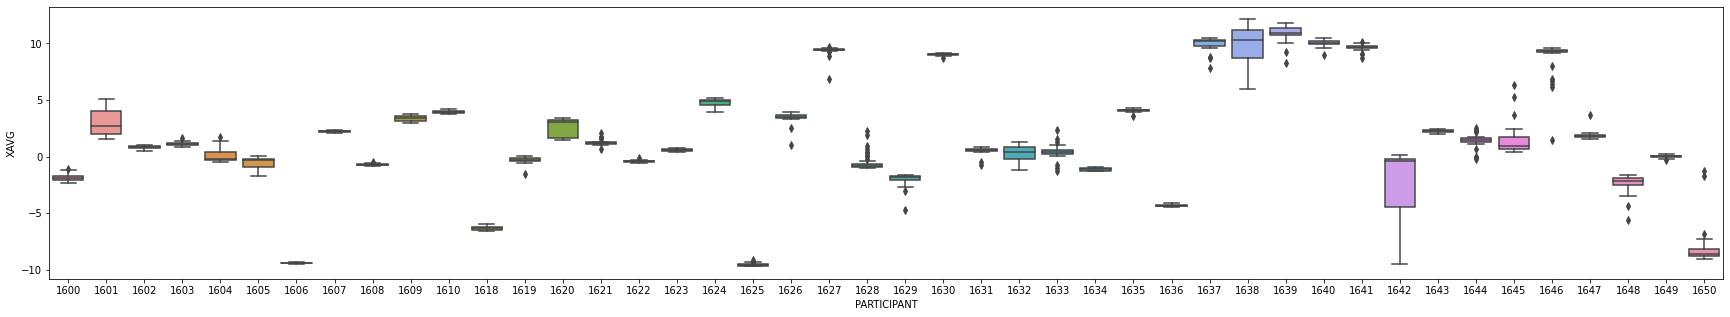

In [15]:
# Partcipants walking different ways for XAVG, but, here the distribution is more concentrated, in some cases
plt.subplots(figsize=(30,5))
sns.boxplot(x = cel_acelerometro[cel_acelerometro['ACTIVITY']=='andar']['PARTICIPANT'],
            y = 'XAVG',
           data = cel_acelerometro)

<AxesSubplot:xlabel='PARTICIPANT', ylabel='Y0'>

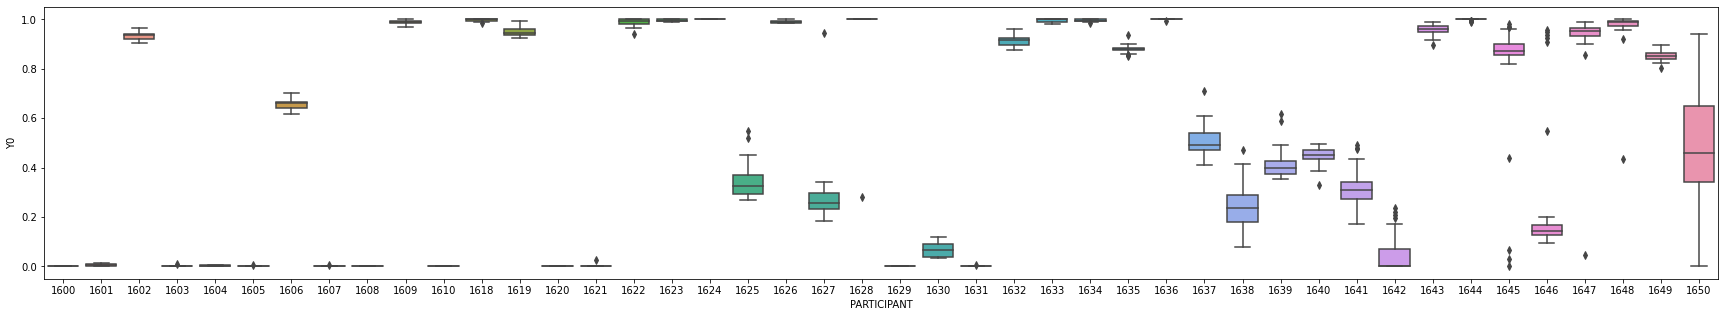

In [16]:
# Partcipants walking different ways for Y0
plt.subplots(figsize=(30,5))
sns.boxplot(x = cel_acelerometro[cel_acelerometro['ACTIVITY']=='andar']['PARTICIPANT'],
            y = 'Y0',
           data = cel_acelerometro)

<AxesSubplot:xlabel='PARTICIPANT', ylabel='RESULTANT'>

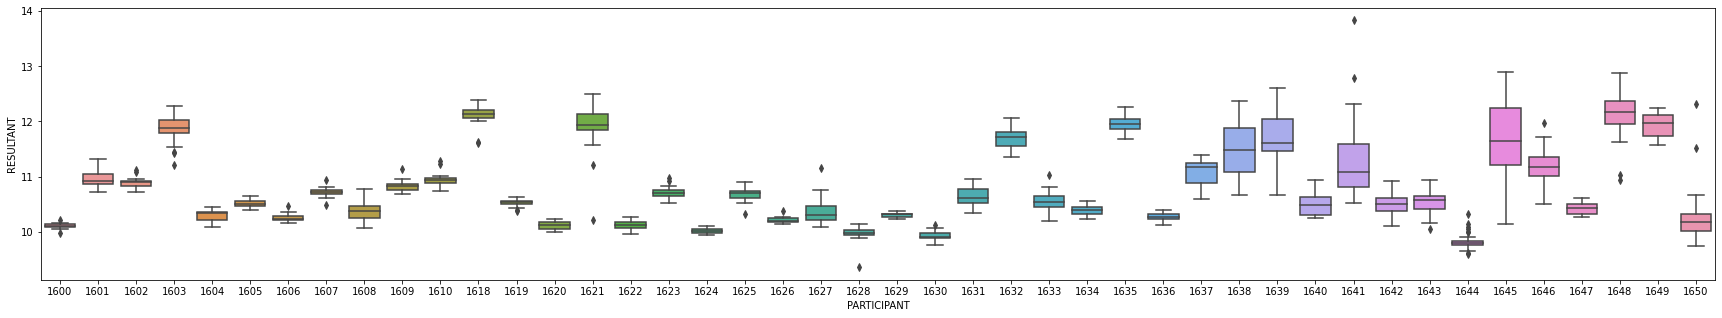

In [17]:
plt.subplots(figsize=(30,5))
sns.boxplot(x = cel_acelerometro[cel_acelerometro['ACTIVITY']=='andar']['PARTICIPANT'],
            y = 'RESULTANT',
           data = cel_acelerometro)

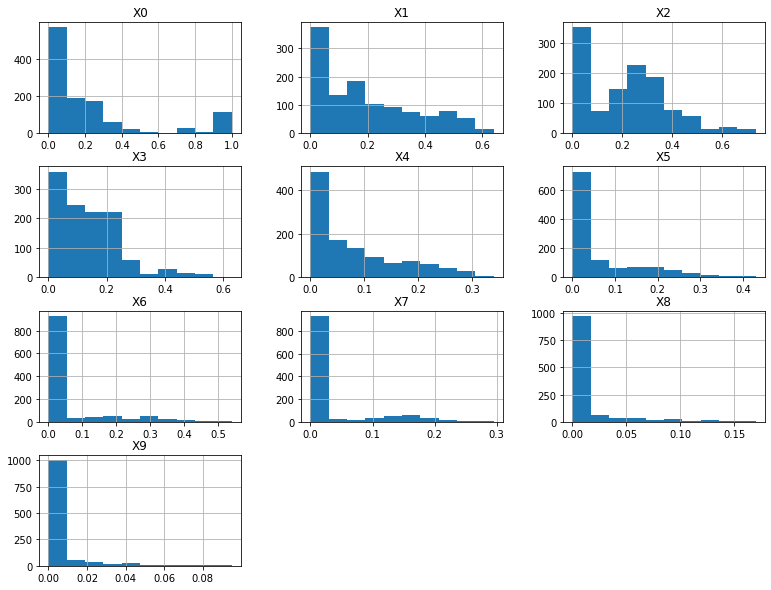

In [18]:
# Walk is not a normal distribution in this DataSet, for any bins at axis X
cel_acelerometro[cel_acelerometro['ACTIVITY']=='andar'].iloc[:,1:11].hist(figsize=(13,10))
plt.show()

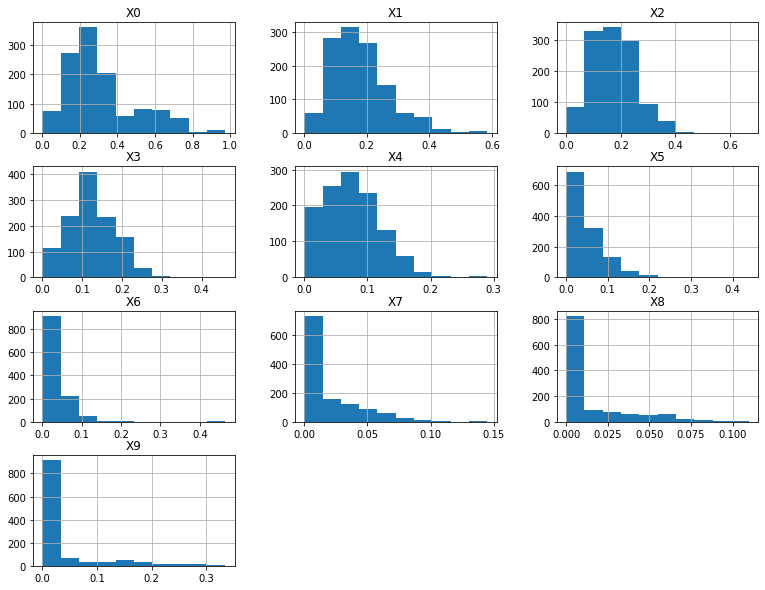

In [19]:
# Run looks like different of walk, in axis X. More closer a normal distribution
cel_acelerometro[cel_acelerometro['ACTIVITY']=='correr'].iloc[:,1:11].hist(figsize=(13,10))
plt.show()

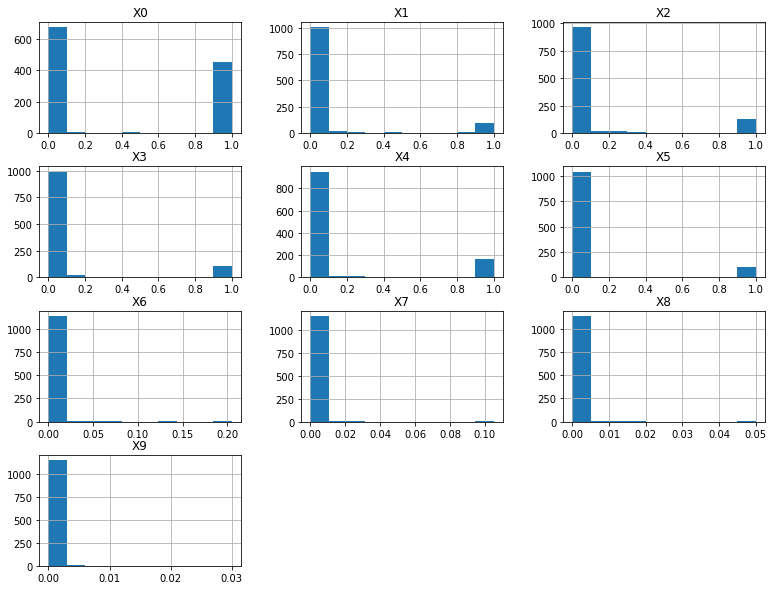

In [20]:
# Sit is an activitie very peculiar
cel_acelerometro[cel_acelerometro['ACTIVITY']=='sentado'].iloc[:,1:11].hist(figsize=(13,10))
plt.show()

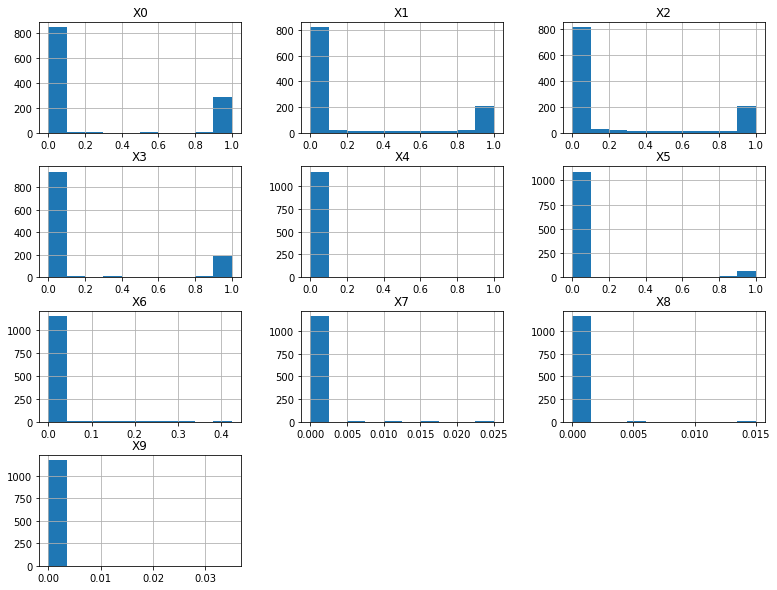

In [21]:
# On foot, is an activitie closer with to sit
cel_acelerometro[cel_acelerometro['ACTIVITY']=='em_pe'].iloc[:,1:11].hist(figsize=(13,10))
plt.show()

# Treino e Teste

In [22]:
X = cel_acelerometro.drop(columns=['ACTIVITY','PARTICIPANT'])
y = cel_acelerometro[['ACTIVITY']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size = 0.2)

# Regressão Logística

In [24]:
# Modeling
clr = LogisticRegression()
clr.fit(X_train, y_train)
# Making predctions on Test Dataset
resultado_clr = clr.predict(X_test)

In [25]:
# Logistic Regression is not a good model to this problem,at the moment.
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, resultado_clr))

                    precision    recall  f1-score   support

             andar       0.48      0.57      0.52       242
        aplaudindo       0.16      0.20      0.18       206
      bebendo_copo       0.13      0.15      0.14       247
     chutando_bola       0.32      0.35      0.34       225
    comendo_fritas       0.16      0.27      0.20       231
    comendo_lanche       0.19      0.13      0.16       210
     comendo_massa       0.06      0.04      0.05       224
            correr       0.71      0.81      0.75       232
         digitando       0.10      0.05      0.07       223
   dobrando_roupas       0.14      0.14      0.14       249
 dribland_basquete       0.38      0.22      0.28       256
             em_pe       0.19      0.40      0.26       219
           escadas       0.38      0.06      0.11       237
  escovando_dentes       0.15      0.14      0.14       243
        escrevendo       0.16      0.15      0.15       220
jogando_bola_tenis       0.23      0.40

# Agrupando

In [27]:
# I have an hipotesys: Peoples make the samen activities in different ways. So, i will go clusterize the Data Set to make predictions in groups.
wcss = []

for i in range(2, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 13)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

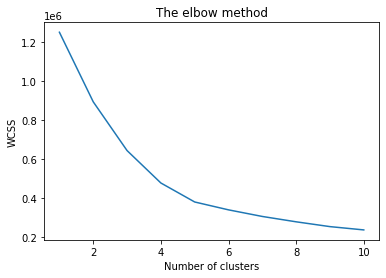

In [28]:
# 5 or 6 groups.
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 6, #numero de cluster q eu quero dividir a amostra
                init = 'k-means++', #seleciona os centróides iniciais do cluster usando amostragem com base em uma distribuição de probabilidade empírica da contribuição dos pontos para a inércia geral.
                max_iter = 300, #Número máximo de iterações do algoritmo k-means para uma única execução.
                n_init = 10, #Número de vezes que o algoritmo k-means será executado com diferentes sementes de centroides.
                random_state = 42)

model = kmeans.fit(X)

In [42]:
cel_acelerometro['grupo'] = model.labels_

In [43]:
cel_acelerometro['grupo'].value_counts(dropna =False, normalize = True)

5    0.292688
4    0.159903
2    0.154673
0    0.147458
1    0.141840
3    0.103438
Name: grupo, dtype: float64

In [44]:
cel_acelerometro.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,RESULTANT,PARTICIPANT,grupo
0,andar,0.255,0.100,0.135,0.160,0.190,0.095,0.045,0.01,0.005,0.005,0.925,0.040,0.035,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.295,0.225,0.225,0.145,0.060,0.045,0.005,0.000,0.000,0.0,1.47977,-8.29618,-0.417344,11.9653,1646,5
1,andar,0.000,0.000,0.035,0.275,0.340,0.195,0.100,0.04,0.015,0.000,0.935,0.065,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.240,0.280,0.225,0.195,0.040,0.015,0.005,0.000,0.000,0.0,6.86447,-6.84821,0.129032,10.5035,1646,5
2,andar,0.000,0.000,0.040,0.335,0.300,0.225,0.080,0.02,0.000,0.000,0.955,0.040,0.005,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.310,0.190,0.075,0.035,0.010,0.000,0.000,0.005,0.0,6.44938,-7.11874,-1.471060,10.6707,1646,4
3,andar,0.000,0.000,0.055,0.360,0.265,0.225,0.080,0.01,0.005,0.000,0.950,0.050,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.390,0.250,0.175,0.085,0.075,0.025,0.000,0.000,0.000,0.0,6.18458,-7.28402,-1.023310,10.6683,1646,5
4,andar,0.005,0.005,0.040,0.310,0.265,0.245,0.090,0.04,0.000,0.000,0.910,0.080,0.005,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.475,0.205,0.170,0.065,0.050,0.015,0.015,0.005,0.000,0.0,6.63307,-6.68428,-1.777950,10.9406,1646,4


# Regressão Logística por Grupo

## Grupo 0

In [45]:
grupo_0 = cel_acelerometro[cel_acelerometro['grupo']==0]

In [46]:
grupo_0['ACTIVITY'].value_counts(dropna = False, normalize = True)

em_pe                 0.104105
jogando_bola_tenis    0.101806
dribland_basquete     0.099179
chutando_bola         0.096880
andar                 0.094581
correr                0.088670
dobrando_roupas       0.087028
escadas               0.064368
escovando_dentes      0.036782
tomando_sopa          0.031856
aplaudindo            0.031527
escrevendo            0.028571
comendo_lanche        0.027258
comendo_fritas        0.026929
digitando             0.022332
sentado               0.022332
comendo_massa         0.019704
bebendo_copo          0.016092
Name: ACTIVITY, dtype: float64

In [47]:
X_0 = grupo_0.drop(columns=['ACTIVITY','grupo','PARTICIPANT'])
y_0 = grupo_0['ACTIVITY']

In [48]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, random_state=13, test_size = 0.2)

## Floresta Randômica por Grupo

In [51]:
from sklearn.ensemble import RandomForestClassifier

clf_floresta_0 = RandomForestClassifier(max_depth=12,
                                        random_state=13,
                                        n_estimators = 100,
                                        criterion = 'entropy',
                                        min_samples_split = 5
                                       )
clf_floresta_0.fit(X_train_0, y_train_0)

predicao_floresta_grupo_0 = clf_floresta_0.predict(X_test_0)


In [52]:
# Principais métricas de performance
print(classification_report(y_test_0, predicao_floresta_grupo_0))

                    precision    recall  f1-score   support

             andar       0.94      0.97      0.96        67
        aplaudindo       0.69      0.56      0.62        16
      bebendo_copo       0.67      0.33      0.44         6
     chutando_bola       0.92      0.87      0.89        63
    comendo_fritas       0.56      0.28      0.37        18
    comendo_lanche       0.93      1.00      0.97        14
     comendo_massa       0.67      0.73      0.70        11
            correr       0.96      0.98      0.97        49
         digitando       1.00      0.83      0.91        18
   dobrando_roupas       0.77      0.98      0.86        45
 dribland_basquete       0.86      0.90      0.88        63
             em_pe       0.74      0.92      0.82        60
           escadas       0.89      0.91      0.90        44
  escovando_dentes       0.76      0.70      0.73        23
        escrevendo       0.92      0.60      0.73        20
jogando_bola_tenis       0.82      0.80

## Grupo 1

In [53]:
grupo_1 = cel_acelerometro[cel_acelerometro['grupo']==1]

In [54]:
grupo_1['ACTIVITY'].value_counts(dropna = False, normalize = True)

comendo_fritas        0.137248
bebendo_copo          0.121885
tomando_sopa          0.111301
sentado               0.105497
digitando             0.087402
escrevendo            0.083988
aplaudindo            0.081256
escovando_dentes      0.077159
comendo_lanche        0.077159
comendo_massa         0.074770
dobrando_roupas       0.024240
dribland_basquete     0.007511
correr                0.003414
em_pe                 0.002048
andar                 0.001707
escadas               0.001366
chutando_bola         0.001366
jogando_bola_tenis    0.000683
Name: ACTIVITY, dtype: float64

In [55]:
X_1 = grupo_1.drop(columns=['ACTIVITY','grupo','PARTICIPANT'])
y_1 = grupo_1['ACTIVITY']

In [56]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=13, test_size = 0.2)

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf_floresta_1 = RandomForestClassifier(max_depth=12,
                                        random_state=13,
                                        n_estimators = 100,
                                        criterion = 'entropy',
                                        min_samples_split = 5
                                       )
clf_floresta_1.fit(X_train_1, y_train_1)

predicao_floresta_grupo_1 = clf_floresta_1.predict(X_test_1)


In [58]:
# Principais métricas de performance
print(classification_report(y_test_1, predicao_floresta_grupo_1))

                   precision    recall  f1-score   support

            andar       0.00      0.00      0.00         1
       aplaudindo       0.84      0.81      0.83        53
     bebendo_copo       0.84      0.90      0.87        69
   comendo_fritas       0.80      0.89      0.85        74
   comendo_lanche       0.90      0.82      0.86        56
    comendo_massa       0.78      0.91      0.84        43
           correr       0.50      0.33      0.40         3
        digitando       0.95      0.95      0.95        55
  dobrando_roupas       1.00      0.70      0.82        10
dribland_basquete       0.80      0.80      0.80         5
            em_pe       0.00      0.00      0.00         1
          escadas       0.00      0.00      0.00         0
 escovando_dentes       0.90      0.79      0.84        48
       escrevendo       0.94      0.94      0.94        48
          sentado       0.93      1.00      0.97        56
     tomando_sopa       0.91      0.83      0.87       

## Grupo 2

In [59]:
grupo_2 = cel_acelerometro[cel_acelerometro['grupo']==2]

In [60]:
grupo_2['ACTIVITY'].value_counts(dropna = False, normalize = True)

escovando_dentes      0.093300
aplaudindo            0.079211
sentado               0.072949
comendo_fritas        0.068879
em_pe                 0.064809
digitando             0.061365
dobrando_roupas       0.061052
escrevendo            0.058547
comendo_lanche        0.054477
bebendo_copo          0.052599
tomando_sopa          0.052599
escadas               0.047902
jogando_bola_tenis    0.043206
dribland_basquete     0.041014
comendo_massa         0.040388
correr                0.039449
andar                 0.037884
chutando_bola         0.030369
Name: ACTIVITY, dtype: float64

In [61]:
X_2 = grupo_2.drop(columns=['ACTIVITY','grupo','PARTICIPANT'])
y_2 = grupo_2['ACTIVITY']

In [62]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=13, test_size = 0.2)

In [63]:
from sklearn.ensemble import RandomForestClassifier

clf_floresta_2 = RandomForestClassifier(max_depth=12,
                                        random_state=13,
                                        n_estimators = 100,
                                        criterion = 'entropy',
                                        min_samples_split = 5
                                       )
clf_floresta_2.fit(X_train_2, y_train_2)

predicao_floresta_grupo_2 = clf_floresta_2.predict(X_test_2)


In [64]:
# Principais métricas de performance
print(classification_report(y_test_2, predicao_floresta_grupo_2))

                    precision    recall  f1-score   support

             andar       0.92      0.77      0.84        30
        aplaudindo       0.98      0.98      0.98        43
      bebendo_copo       1.00      0.84      0.91        37
     chutando_bola       0.81      0.91      0.86        23
    comendo_fritas       0.89      0.83      0.86        41
    comendo_lanche       0.79      0.89      0.84        35
     comendo_massa       0.96      0.88      0.92        25
            correr       0.93      0.96      0.94        26
         digitando       0.85      0.87      0.86        39
   dobrando_roupas       0.65      0.86      0.74        37
 dribland_basquete       0.96      0.89      0.93        28
             em_pe       0.95      0.88      0.91        41
           escadas       0.73      0.81      0.77        37
  escovando_dentes       0.91      0.92      0.91        63
        escrevendo       0.97      1.00      0.98        29
jogando_bola_tenis       0.88      0.81

## Grupo 3

In [65]:
grupo_3 = cel_acelerometro[cel_acelerometro['grupo']==3]

In [66]:
grupo_3['ACTIVITY'].value_counts(dropna = False, normalize = True)

comendo_massa         0.111423
comendo_lanche        0.099719
bebendo_copo          0.078652
sentado               0.075843
aplaudindo            0.070225
comendo_fritas        0.060861
tomando_sopa          0.058052
escrevendo            0.056180
digitando             0.053371
andar                 0.046816
correr                0.044944
escadas               0.043071
dobrando_roupas       0.040262
escovando_dentes      0.038390
dribland_basquete     0.038390
chutando_bola         0.037921
em_pe                 0.032303
jogando_bola_tenis    0.013577
Name: ACTIVITY, dtype: float64

In [67]:
X_3 = grupo_3.drop(columns=['ACTIVITY','grupo','PARTICIPANT'])
y_3 = grupo_3['ACTIVITY']

In [68]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=13, test_size = 0.2)

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf_floresta_3 = RandomForestClassifier(max_depth=12,
                                        random_state=13,
                                        n_estimators = 100,
                                        criterion = 'entropy',
                                        min_samples_split = 5
                                       )
clf_floresta_3.fit(X_train_3, y_train_3)

predicao_floresta_grupo_3 = clf_floresta_3.predict(X_test_3)


In [70]:
# Principais métricas de performance
print(classification_report(y_test_3, predicao_floresta_grupo_3))

                    precision    recall  f1-score   support

             andar       1.00      0.86      0.93        22
        aplaudindo       0.92      0.79      0.85        28
      bebendo_copo       0.76      0.83      0.79        35
     chutando_bola       0.84      0.94      0.89        17
    comendo_fritas       0.86      0.92      0.89        26
    comendo_lanche       0.93      0.93      0.93        41
     comendo_massa       0.94      0.83      0.88        54
            correr       0.93      1.00      0.97        14
         digitando       0.93      1.00      0.96        25
   dobrando_roupas       0.75      0.83      0.79        18
 dribland_basquete       0.85      0.73      0.79        15
             em_pe       0.92      0.85      0.88        13
           escadas       0.78      0.82      0.80        17
  escovando_dentes       0.91      0.62      0.74        16
        escrevendo       0.80      0.92      0.86        26
jogando_bola_tenis       0.29      1.00

## Grupo 4

In [71]:
grupo_4 = cel_acelerometro[cel_acelerometro['grupo']==4]

In [72]:
grupo_4['ACTIVITY'].value_counts(dropna = False, normalize = True)

bebendo_copo          0.099637
escovando_dentes      0.098122
comendo_lanche        0.088431
digitando             0.087826
comendo_massa         0.085403
aplaudindo            0.085403
escrevendo            0.082980
sentado               0.075409
tomando_sopa          0.074803
comendo_fritas        0.061781
andar                 0.036644
dribland_basquete     0.026348
chutando_bola         0.025439
dobrando_roupas       0.018474
escadas               0.016657
correr                0.015748
jogando_bola_tenis    0.014537
em_pe                 0.006360
Name: ACTIVITY, dtype: float64

In [73]:
X_4 = grupo_4.drop(columns=['ACTIVITY','grupo','PARTICIPANT'])
y_4 = grupo_4['ACTIVITY']

In [74]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=13, test_size = 0.2)

In [75]:
from sklearn.ensemble import RandomForestClassifier

clf_floresta_4 = RandomForestClassifier(max_depth=12,
                                        random_state=13,
                                        n_estimators = 100,
                                        criterion = 'entropy',
                                        min_samples_split = 5
                                       )
clf_floresta_4.fit(X_train_4, y_train_4)

predicao_floresta_grupo_4 = clf_floresta_4.predict(X_test_4)


In [76]:
# Principais métricas de performance
print(classification_report(y_test_4, predicao_floresta_grupo_4))

                    precision    recall  f1-score   support

             andar       0.87      0.95      0.91        21
        aplaudindo       0.98      0.79      0.88        58
      bebendo_copo       0.87      0.82      0.84        65
     chutando_bola       0.61      0.85      0.71        13
    comendo_fritas       0.95      0.79      0.86        47
    comendo_lanche       0.84      0.89      0.87        65
     comendo_massa       0.81      0.91      0.86        53
            correr       0.92      1.00      0.96        11
         digitando       0.90      0.96      0.93        57
   dobrando_roupas       0.67      0.86      0.75        14
 dribland_basquete       0.73      0.69      0.71        16
             em_pe       1.00      0.50      0.67         2
           escadas       0.92      0.67      0.77        18
  escovando_dentes       0.85      0.90      0.87        58
        escrevendo       0.88      0.95      0.91        55
jogando_bola_tenis       0.80      0.62

## Grupo 5

In [77]:
grupo_5 = cel_acelerometro[cel_acelerometro['grupo']==5]

In [78]:
grupo_5['ACTIVITY'].value_counts(dropna = False, normalize = True)

correr                0.105890
chutando_bola         0.105063
jogando_bola_tenis    0.104897
escadas               0.094639
em_pe                 0.091827
andar                 0.088352
dribland_basquete     0.086863
dobrando_roupas       0.078590
escrevendo            0.036234
tomando_sopa          0.030113
comendo_massa         0.024653
digitando             0.024487
comendo_lanche        0.024156
aplaudindo            0.023660
sentado               0.022171
escovando_dentes      0.021840
bebendo_copo          0.021674
comendo_fritas        0.014891
Name: ACTIVITY, dtype: float64

In [79]:
X_5 = grupo_5.drop(columns=['ACTIVITY','grupo','PARTICIPANT'])
y_5 = grupo_5['ACTIVITY']

In [80]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, random_state=13, test_size = 0.2)

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf_floresta_5 = RandomForestClassifier(max_depth=12,
                                        random_state=13,
                                        n_estimators = 100,
                                        criterion = 'entropy',
                                        min_samples_split = 5
                                       )
clf_floresta_5.fit(X_train_5, y_train_5)

predicao_floresta_grupo_5 = clf_floresta_5.predict(X_test_5)


In [82]:
# Principais métricas de performance
print(classification_report(y_test_5, predicao_floresta_grupo_5))

                    precision    recall  f1-score   support

             andar       0.93      0.95      0.94        98
        aplaudindo       0.88      0.79      0.84        29
      bebendo_copo       0.74      0.77      0.75        26
     chutando_bola       0.68      0.89      0.77       113
    comendo_fritas       0.82      0.69      0.75        13
    comendo_lanche       0.76      0.86      0.81        22
     comendo_massa       0.86      0.77      0.81        31
            correr       0.92      0.96      0.94       127
         digitando       0.97      0.83      0.89        35
   dobrando_roupas       0.81      0.82      0.81       110
 dribland_basquete       0.74      0.69      0.71        99
             em_pe       0.91      0.84      0.88       114
           escadas       0.80      0.84      0.82       126
  escovando_dentes       0.87      0.90      0.88        29
        escrevendo       0.93      0.82      0.87        51
jogando_bola_tenis       0.72      0.67